# 1. Decision Tree

In [18]:
#의사결정나무
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import*
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# load data
train = pd.read_csv('./train.csv').iloc[:, 1:]
# split data into X and y
dfX = train.iloc[:,:-1]
dfy = train.iloc[:,[-1]]
tree1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=100).fit(dfX, dfy.values.ravel())
n_estimators = 30
tree2 = ExtraTreesClassifier(max_depth=100, n_estimators=n_estimators).fit(dfX, dfy.values.ravel())
#print('[feature importance]')
fi2 = tree1.feature_importances_
fi3 = tree2.feature_importances_
#print(fi2)
#print(fi3)
print()
print('[useless feature]')
print('-DecisionTree result')
print(dfX.columns[np.where(fi2==0)[0]])
print()
print('-Extremely Randomized Trees')
print(dfX.columns[np.where(fi3==0)[0]])
pred_y2 = tree1.predict(dfX)
print()
#print('[result by train data]')
#print(classification_report(dfy, pred_y2, target_names = ["1", "2", "3", "4", "5", "6", "7"]))
#cross validation
cv = KFold(5, shuffle=True)
result = cross_val_score(tree1, dfX, dfy.values.ravel(), scoring='accuracy', cv=cv)
result_r = cross_val_score(tree2, dfX, dfy.values.ravel(), scoring='accuracy', cv=cv)
print()
print()
print('[cross validation result]')
print('-DecisionTree result')
print(result)
print('mean {}'.format(np.mean(result)))
print('std {}'.format(np.std(result)))
print()
print('-Extremely Randomized Trees')
print(result_r)
print('mean {}'.format(np.mean(result_r)))
print('std {}'.format(np.std(result_r)))


[useless feature]
-DecisionTree result
Index(['Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type15', 'Soil_Type18',
       'Soil_Type25', 'Soil_Type28', 'Soil_Type36', 'Soil_Type37'],
      dtype='object')

-Extremely Randomized Trees
Index(['Soil_Type7', 'Soil_Type15'], dtype='object')



[cross validation result]
-DecisionTree result
[ 0.79166667  0.7989418   0.79927249  0.79100529  0.79927249]
mean 0.7960317460317461
std 0.0038416761194332203

-Extremely Randomized Trees
[ 0.85218254  0.86375661  0.85582011  0.85482804  0.8587963 ]
mean 0.8570767195767196
std 0.003953898195141563


# 2. xgboost

/Users/seungminbaek/.pyenv/versions/3.6.1/envs/dss/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)



[result by train data]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00      2160
          2       1.00      1.00      1.00      2160
          3       1.00      1.00      1.00      2160
          4       1.00      1.00      1.00      2160
          5       1.00      1.00      1.00      2160
          6       1.00      1.00      1.00      2160
          7       1.00      1.00      1.00      2160

avg / total       1.00      1.00      1.00     15120

[feature importance]
[  1.49320930e-01   6.89790696e-02   4.41331789e-02   7.73538128e-02
   8.17335621e-02   1.54691249e-01   5.66748269e-02   5.99985272e-02
   5.70350289e-02   1.50016785e-01   6.13984093e-03   2.79158098e-03
   7.17952056e-03   2.03024084e-03   1.60454516e-03   4.01136279e-03
   3.07810702e-03   4.66627907e-03   1.35895144e-03   3.47105670e-03
   0.00000000e+00   0.00000000e+00   2.61966547e-04   8.17008223e-03
   3.29914130e-03   1.46537542e-03   3.22546321e-03   9.66001

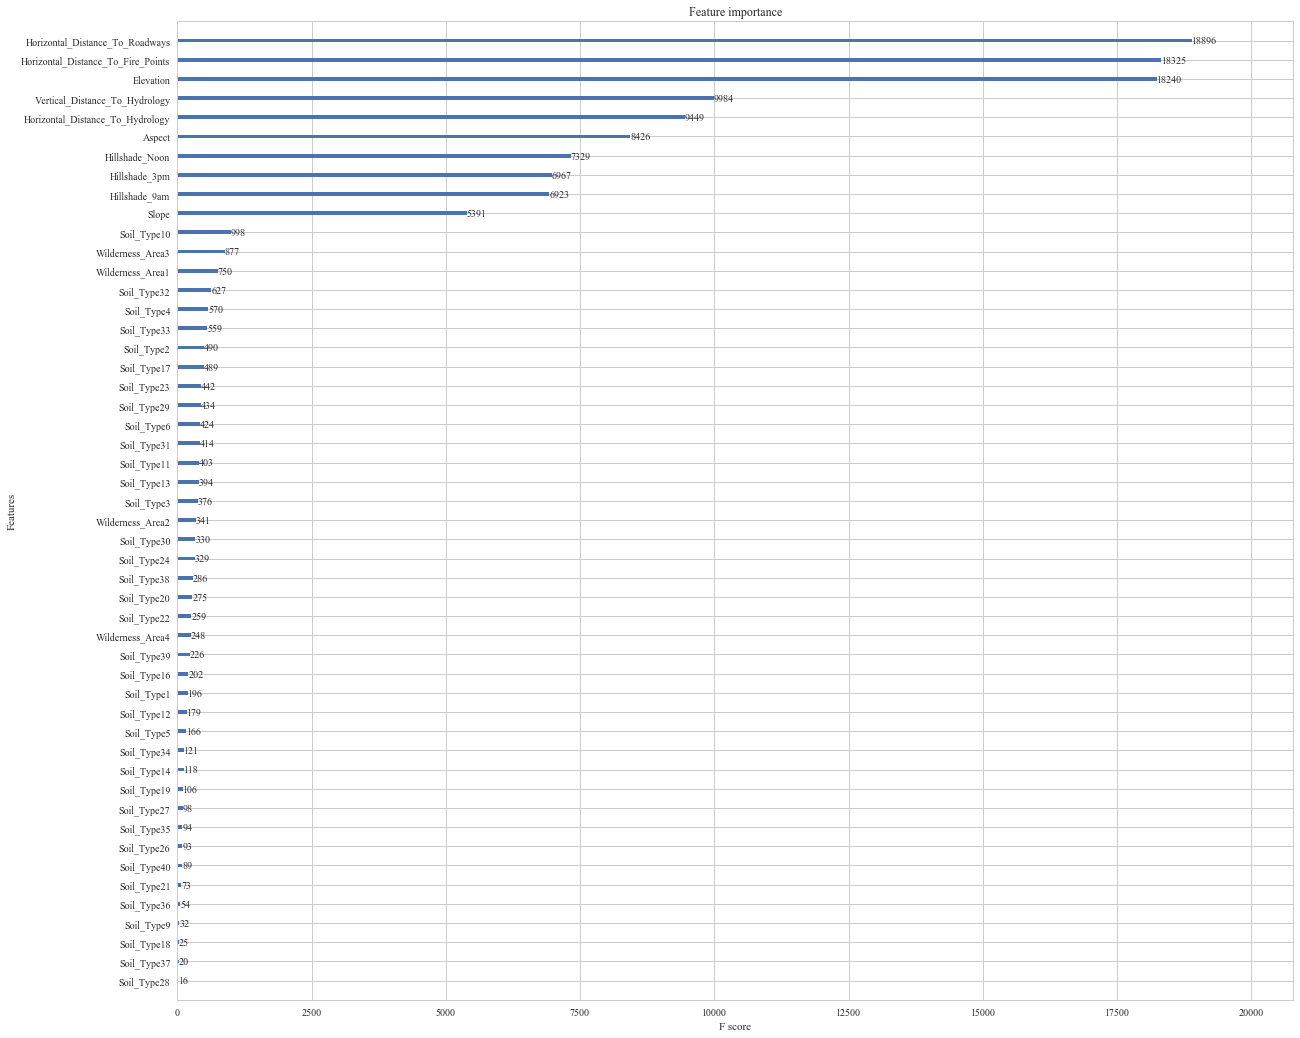

In [2]:
# k-fold cross validation evaluation of xgboost model
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import*
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
# load data
train = pd.read_csv('./train.csv').iloc[:, 1:]
# split data into X and y
dfX = train.iloc[:,:-1]
dfy = train.iloc[:,[-1]]
#scaling 
scaler = RobustScaler()
dfX_train = scaler.fit_transform(dfX)
dfX_test = scaler.transform(dfX)
#model&fitting
#model = XGBClassifier() #옵션없이 그대로 돌릴경우 계산량은 낮아짐. 하지만 스코어도 낮아짐.(0.7정도로)
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=5) 
result = model.fit(dfX, dfy.values.ravel()) #원본데이터:dfX, 스케일링데이터:dfX_train
#result with train data 
print()
print('[result by train data]')
pred_y = result.predict(dfX)
print(classification_report(dfy, pred_y, target_names = ["1", "2", "3", "4", "5", "6", "7"]))
#feature_importance
fig = plt.figure(figsize=(20, 18))
ax = plt.subplot()
plot_importance(result, ax=ax)
fi = result.feature_importances_
print('[feature importance]')
print(fi)
print()
print('[useless feature]')
print(dfX.columns[np.where(fi==0)[0]])

In [3]:
#cross validation
kfold = KFold(n_splits=5, shuffle=True)
results = cross_val_score(model, dfX, dfy.values.ravel(), cv=kfold)
print("Accuracy: ({}, {})".format(results.mean(), results.std()))
print(results)

Accuracy: (0.8595238095238095, 0.0075478003268185405)
[ 0.86640212  0.86772487  0.8505291   0.8505291   0.86243386]
